In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [2]:
theta_vector = np.array([-25,0,0,1,1])

np.random.seed(10)
x1_inputs = np.random.uniform(-10, 10, size=10_000)
np.random.seed(100)
x2_inputs = np.random.uniform(-10, 10, size=10_000)

row_list = []
labels = []

for x1,x2 in zip(x1_inputs,x2_inputs):
    x_i_vector = np.array([1,x1,x2,x1**2,x2**2])
    row_list.append(x_i_vector)
    
    hypothesis_prediction = np.dot(theta_vector, x_i_vector)
    if hypothesis_prediction >= 25:
        labels.append(1)
    else:
        labels.append(0)

In [3]:
design_matrix = np.array(row_list)
data = pd.DataFrame(row_list,columns = ['intercept','x1','x2','x1_squared','x2_squared'])
data['label'] = labels
np.random.seed(123)
test_ids = np.random.choice(np.arange(0, data.shape[0]), size=int(.20*data.shape[0]), replace=False)
test_data = data[data.index.isin(test_ids)]
training_data = data[~data.index.isin(test_ids)]

In [4]:
test_data['type'] = 'test'
training_data['type'] = 'train'

full_data = pd.concat([test_data,training_data])


<ipython-input-4-475f72e6d0c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['type'] = 'test'
<ipython-input-4-475f72e6d0c8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data['type'] = 'train'


In [5]:
X_train_logreg = training_data[['x1', 'x2', 'x1_squared', 'x2_squared']]
y_train = training_data['label']
X_test_logreg = test_data[['x1', 'x2', 'x1_squared', 'x2_squared']]
y_test = test_data['label']

In [6]:
scaler_logreg = StandardScaler()
X_train_scaled_logreg = scaler_logreg.fit_transform(X_train_logreg)
X_test_scaled_logreg = scaler_logreg.transform(X_test_logreg)

In [7]:
logreg = LogisticRegression(solver='liblinear', random_state=42) 
logreg.fit(X_train_scaled_logreg, y_train)
y_pred_logreg = logreg.predict(X_test_scaled_logreg)

In [8]:
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
print(f"Accuracy: {accuracy_logreg:.4f}")
print("Confusion Matrix:\n", cm_logreg)

Accuracy: 0.9970
Confusion Matrix:
 [[ 782    0]
 [   6 1212]]


In [9]:
X_train_knn = training_data[['x1', 'x2']]
X_test_knn = test_data[['x1', 'x2']]

In [10]:
scaler_knn = StandardScaler()
X_train_scaled_knn = scaler_knn.fit_transform(X_train_knn)
X_test_scaled_knn = scaler_knn.transform(X_test_knn)

In [11]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled_knn, y_train)
y_pred_knn = knn.predict(X_test_scaled_knn)

In [12]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(f"Accuracy: {accuracy_knn:.4f}")
print("Confusion Matrix:\n", cm_knn)

Accuracy: 0.9915
Confusion Matrix:
 [[ 775    7]
 [  10 1208]]


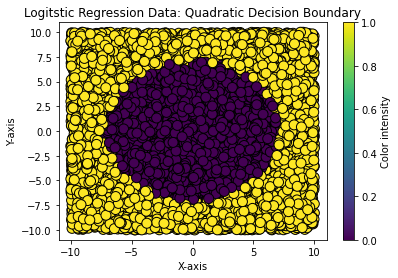

In [13]:
# Create the scatter plot
plt.scatter(x1_inputs, x2_inputs, c=labels, cmap='viridis', s=100, edgecolor='k')

# Add a color bar
plt.colorbar(label='Color intensity')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Logitstic Regression Data: Quadratic Decision Boundary')

# Show the plot
plt.show()